<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadecvsopendatacvsfiles-ManuelPerezOrt/blob/main/LeyendoCSVDelOpendataDelCMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: 25 de Junio de 2024

Algunos de los archivos para educación del CMS con datos abiertos están en un formato CSV. Este formato es un formato de texto sencillo en donde cada evento se guarda en columnas y cada columna correspende a una variable cinemática reconstruida con el detector. Se puede encontrar un ejemplo de esta liga
https://opendata.cern.ch/record/5208.
En partícular estos datos presentan las variables cinemáticas de dos muones producto final de la colisión protón-protón. Las variables se pueden determinar usando los cuadrimomentos de las partículas (https://es.wikipedia.org/wiki/Cuadrimomento)

Usamos panda para leer con python el archivo CSV.

In [76]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')

num_rows = len(particles)
print(num_rows)

# Calcula las estadísticas descriptivas para 'pt1' y 'pt2'
stats_pt1 = particles['pt1'].describe()
stats_pt2 = particles['pt2'].describe()
stats_eta1 = particles['eta1'].describe()
stats_eta2 = particles['eta2'].describe()
stats_phi1 = particles['phi1'].describe()
stats_phi2 = particles['phi2'].describe()
stats_dxy1 = particles['dxy1'].describe()
stats_dxy2 = particles['dxy2'].describe()
stats_iso1 = particles['iso1'].describe()
stats_iso2 = particles['iso2'].describe()

# Crea un DataFrame para mostrar las estadísticas en una tabla
stats_table = pd.DataFrame({'pt1': stats_pt1, 'pt2': stats_pt2,
                            'eta1': stats_eta1, 'eta2': stats_eta2,
                            'phi1': stats_phi1, 'phi2': stats_phi2,
                            'dxy1': stats_dxy1, 'dxy2': stats_dxy2,
                            'iso1': stats_iso1, 'iso2': stats_iso2})
stats_table = stats_table.round(2)
# Muestra la tabla
print(stats_table)

particles.head()


10000
            pt1       pt2      eta1      eta2      phi1      phi2      dxy1  \
count  10000.00  10000.00  10000.00  10000.00  10000.00  10000.00  10000.00   
mean      38.40     38.64     -0.28      0.08     -0.23      0.25      0.01   
std       14.43     15.95      1.35      0.87      1.80      1.79      0.07   
min        3.46      3.27     -2.44     -2.43     -3.14     -3.14     -3.59   
25%       30.16     30.03     -1.43     -0.57     -1.78     -1.26     -0.05   
50%       38.88     38.93     -0.56      0.08     -0.43      0.41      0.01   
75%       45.06     45.19      1.09      0.74      1.30      1.80      0.07   
max      269.08    528.43      2.10      2.10      3.14      3.14      2.03   

           dxy2      iso1      iso2  
count  10000.00  10000.00  10000.00  
mean       0.01      1.51      1.73  
std        1.78      6.35      6.81  
min       -2.01      0.00      0.00  
25%       -0.07      0.00      0.00  
50%       -0.01      0.00      0.00  
75%        0.05 

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


Los nombres de las columnas se refieren a las variables que describen a llos dos muones. Corrida (Etiqueta del haz), Número de evento (colisión), Momento Transverso del primer muon, Eta del primer muón, Phi del primer muón, Carga del primer muón, distancia al vertice, lo mismo para el segundo muon y finalmente la variable de aislamiento que se relaciona con la energía de las trazas que rodean al muon.

In [ ]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def mtransversa(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
mtransv=mtransversa(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(mtransv,mtransv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
pt1=particles['pt1']
#Se crea y se grafica el histograma.
fig_5=px.histogram(pt1,pt1)
fig_5.update_layout(title=r"$\text{Momento Transverso del Primer Muon} \ Pt_1, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
pt2=particles['pt2']
#Se crea y se grafica el histograma.
fig_5=px.histogram(pt2,pt2)
fig_5.update_layout(title=r"$\text{Momento Transverso del Segundo Muon} \ Pt_2, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
eta1=particles['eta1']
#Se crea y se grafica el histograma.
fig_5=px.histogram(eta1,eta1)
fig_5.update_layout(title=r"$\text{La pseudorrapidez del primer muón} \ eta_1, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

# **Tarea: Selección de datos usando el archivo CVS y los conocimientos de reconstrucción**

In [121]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import plotly.express as px

# Carga los datos
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')

# Filtracion de los datos
filtered_particles = particles[
  (particles['pt1'] > 20) & (particles['pt1']< 100) & (particles['pt2'] > 20) & (particles['pt2']< 100)
& (particles['eta1'] > -2.1) & (particles['eta1']< 2.1) & (particles['eta2'] > -2.1) & (particles['eta2']< 2.1)
& (particles['phi1'] > -3.14) & (particles['phi1']< 3.14) & (particles['phi2'] > -3.14) & (particles['phi2']< 3.14)
& (particles['dxy1'] > -0.09) & (particles['dxy1']< 0.09) & (particles['dxy2'] > -0.09) & (particles['dxy2']< 0.09)
& (particles['iso1']< 0.15) & (particles['iso2']< 0.15) & (particles['Q1'] != particles['Q2']) ]

num_rows = len(filtered_particles)
print("El numero de eventos es " + str(num_rows))

# Calcula las estadísticas descriptivas
stats_pt1 = filtered_particles['pt1'].describe()
stats_pt2 = filtered_particles['pt2'].describe()
stats_eta1 = filtered_particles['eta1'].describe()
stats_eta2 = filtered_particles['eta2'].describe()
stats_phi1 = filtered_particles['phi1'].describe()
stats_phi2 = filtered_particles['phi2'].describe()
stats_dxy1 = filtered_particles['dxy1'].describe()
stats_dxy2 = filtered_particles['dxy2'].describe()
stats_iso1 = filtered_particles['iso1'].describe()
stats_iso2 = filtered_particles['iso2'].describe()

# Crea un DataFrame para mostrar las estadísticas en una tabla
stats_table = pd.DataFrame({'pt1': stats_pt1, 'pt2': stats_pt2,
                            'eta1': stats_eta1, 'eta2': stats_eta2,
                            'phi1': stats_phi1, 'phi2': stats_phi2,
                            'dxy1': stats_dxy1, 'dxy2': stats_dxy2,
                            'iso1': stats_iso1, 'iso2': stats_iso2})
stats_table = stats_table.round(2)
# Muestra la tabla
print(stats_table)

# Muestra las primeras 5 filas de los datos filtrados
filtered_particles.head()


El numero de eventos es 4036
           pt1      pt2     eta1     eta2     phi1     phi2     dxy1     dxy2  \
count  4036.00  4036.00  4036.00  4036.00  4036.00  4036.00  4036.00  4036.00   
mean     40.71    40.67    -0.05     0.03    -0.27     0.29     0.01    -0.01   
std      10.44    10.54     1.29     0.80     1.79     1.79     0.06     0.06   
min      20.05    20.03    -2.10    -2.10    -3.14    -3.14    -0.09    -0.09   
25%      34.22    33.75    -1.25    -0.58    -1.80    -1.25    -0.05    -0.07   
50%      40.74    40.62    -0.09     0.02    -0.47     0.49     0.02    -0.02   
75%      45.62    45.59     1.22     0.65     1.26     1.83     0.07     0.05   
max      99.09    99.31     2.10     2.10     3.14     3.14     0.09     0.09   

         iso1    iso2  
count  4036.0  4036.0  
mean      0.0     0.0  
std       0.0     0.0  
min       0.0     0.0  
25%       0.0     0.0  
50%       0.0     0.0  
75%       0.0     0.0  
max       0.0     0.0  


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0,28.5389,0.3852,-1.9912,1,0.0515,0.0
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0,48.2790,-0.1956,2.9703,-1,-0.0492,0.0
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0,39.8616,0.2630,0.9183,1,-0.0407,0.0
8,165617,77076988,38.1511,-0.8702,1.7165,1,-0.0840,0.0,37.8959,0.5000,-1.8676,-1,0.0652,0.0
9,165617,77459740,51.6437,-1.2153,1.8670,-1,-0.0826,0.0,42.5626,-1.0076,-0.9362,1,0.0810,0.0


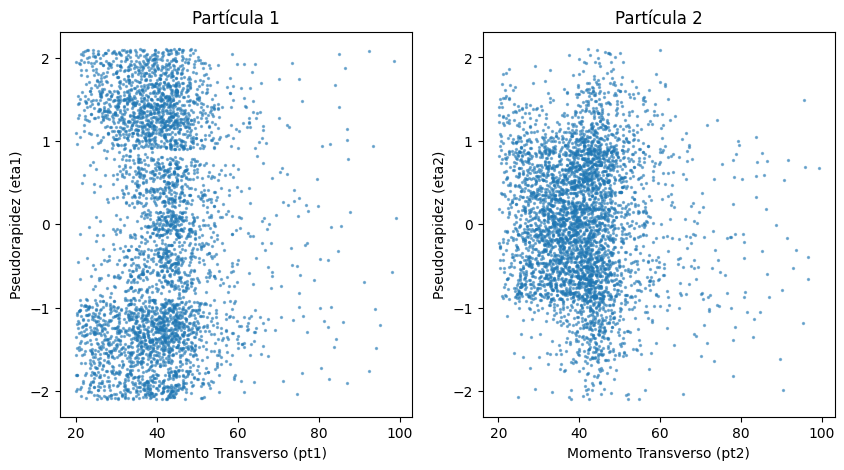

In [122]:
# @title pt1 vs eta1

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['pt1'], filtered_particles['eta1'], s=2, alpha=0.5)
plt.xlabel('Momento Transverso (pt1)')
plt.ylabel('Pseudorapidez (eta1)')
plt.title('Partícula 1')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['pt2'], filtered_particles['eta2'], s=2, alpha=0.5)
plt.xlabel('Momento Transverso (pt2)')
plt.ylabel('Pseudorapidez (eta2)')
_ = plt.title('Partícula 2')

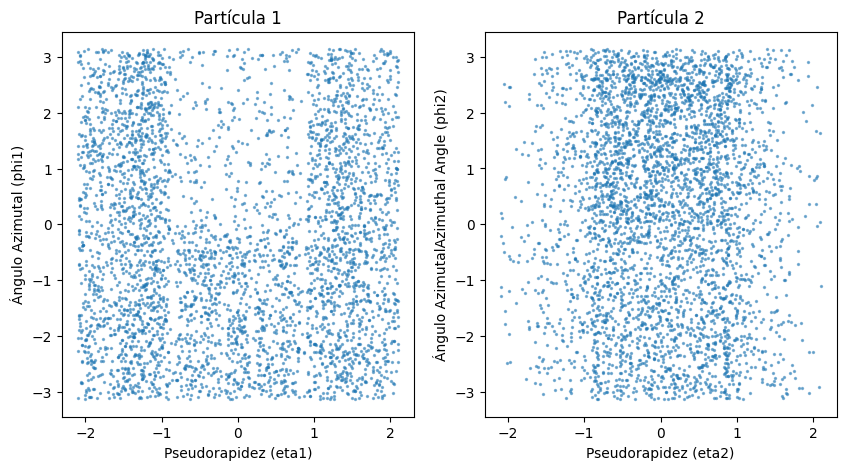

In [123]:
# @title Pseudorapidity vs Azimuthal Angle

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['eta1'], filtered_particles['phi1'], s=2, alpha=0.5)
plt.xlabel('Pseudorapidez (eta1)')
plt.ylabel('Ángulo Azimutal (phi1)')
plt.title('Partícula 1')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['eta2'], filtered_particles['phi2'], s=2, alpha=0.5)
plt.xlabel('Pseudorapidez (eta2)')
plt.ylabel('Ángulo AzimutalAzimuthal Angle (phi2)')
_ = plt.title('Partícula 2')

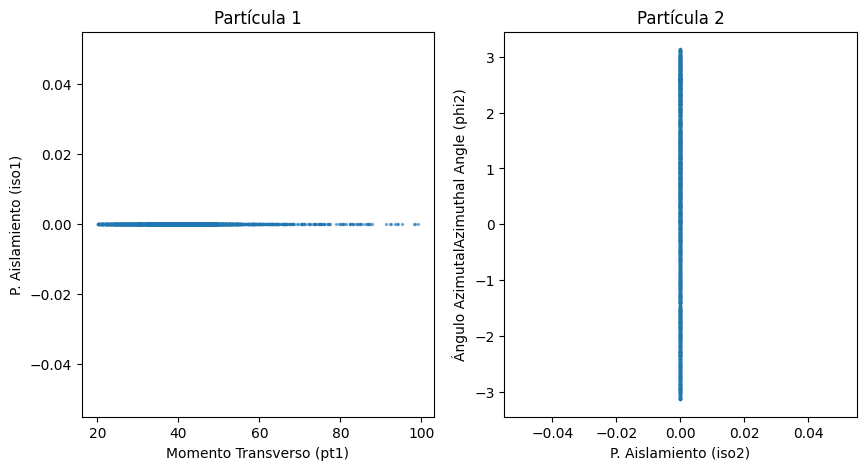

In [124]:
# @title Aislamiento vs Azimuthal Angle

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['pt1'], filtered_particles['iso1'], s=2, alpha=0.5)
plt.xlabel('Momento Transverso (pt1)')
plt.ylabel('P. Aislamiento (iso1)')
plt.title('Partícula 1')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['iso2'], filtered_particles['phi2'], s=2, alpha=0.5)
plt.xlabel('P. Aislamiento (iso2)')
plt.ylabel('Ángulo AzimutalAzimuthal Angle (phi2)')
_ = plt.title('Partícula 2')

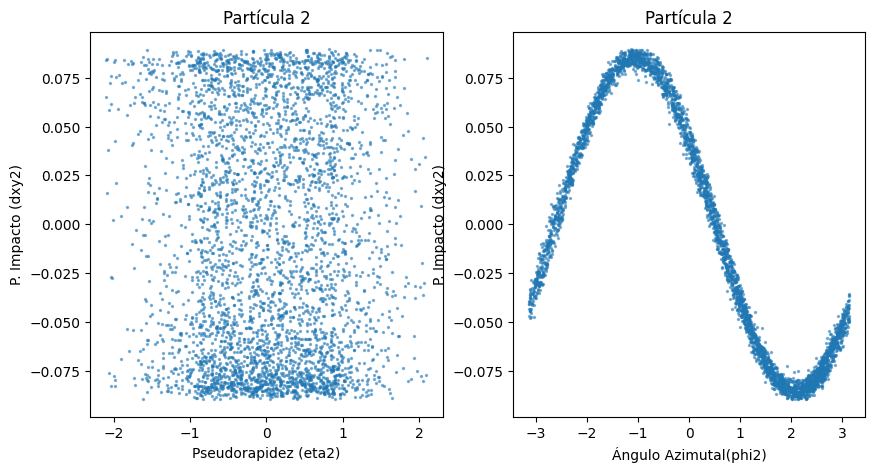

In [143]:
# @title Aislamiento vs Azimuthal Angle

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(filtered_particles['eta2'], filtered_particles['dxy2'], s=2, alpha=0.5)
plt.ylabel('P. Impacto (dxy2)')
plt.xlabel('Pseudorapidez (eta2)')
plt.title('Partícula 2')

plt.subplot(1, 2, 2)
plt.scatter(filtered_particles['phi2'], filtered_particles['dxy2'], s=2, alpha=0.5)
plt.xlabel('Ángulo Azimutal(phi2)')
plt.ylabel('P. Impacto (dxy2)')
_ = plt.title('Partícula 2')

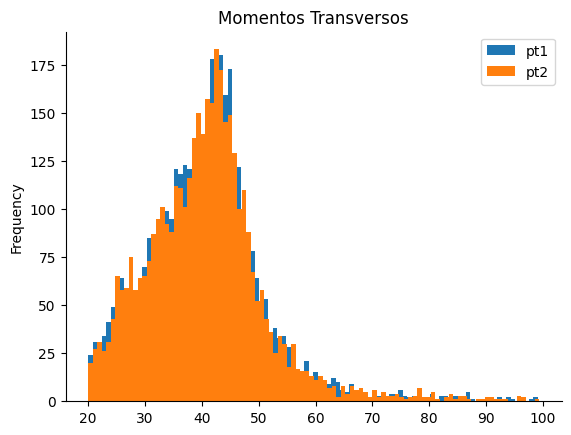

In [126]:
from matplotlib import pyplot as plt

filtered_particles['pt1'].plot(kind='hist', bins=100, label='pt1')
filtered_particles['pt2'].plot(kind='hist', bins=100, label='pt2', title='Momentos Transversos')

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.legend()
plt.show()


In [127]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def minvariante(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa invariante.
minv=minvariante(filtered_particles['pt1'],filtered_particles['pt2'],filtered_particles['eta1'],filtered_particles['eta2'],filtered_particles['phi1'],filtered_particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(minv,minv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

# Calcula y muestra la media, la desviación estándar, etc. para 'minv'
mean_pt2 = minv.mean()
std_pt2 = minv.std()
min_pt2 = minv.min()
max_pt2 = minv.max()

print(f"Masa Invariente: Media = {mean_pt2}, Desviación estándar = {std_pt2}, Mínimo = {min_pt2}, Máximo = {max_pt2}")

Masa Invariente: Media = 89.788298973419, Desviación estándar = 6.3932925181157145, Mínimo = 60.028746709458304, Máximo = 118.7349214081213
